<font color='#09aed9'><h1>"<u>Wrangle and Analyze Data</u>" Project</h1></font>
- [Gather](#Gather)
- [Assess](#Assess)
   - [Quality issues](#Quality)
   - [Tidiness issues](#Tidiness)
   - [Assessing `twitter_archive`](#twitter_archive)
   - [Assessing `image_predictions`](#image_predictions)
   - [Assessing `tweet_json_df`](#tweet_json_df)
- [Clean](#Clean)
[<font color='#5FB1FF'><h2><u>Insights</u></h2></font>](#Insight)
    - [<font color='#AD1FFF'><h5>1st: The vast majority of the tweets were pushed up from "Twitter" app on an iPhone device with 1964 times and about 94% of total tweets</h5></font>](#1st)
    - [<font color='green'><h5>2nd: 'Charlie', 'Lucy', 'Oliver' and Cooper are sharing almost the same times 11 or 10 to be a given name lying within the most given names, while 'Laika', 'Jeffri', 'Mollie', 'Leela', and 'Rhino' are lying on the tail with one time to be a given name</h5></font>](#2nd)
    - [<font color='#5FB1FF'><h5>3rd: With 132810 likes, a tweet sent on 2017-01-21 6:26:02 PM from Twitter for iPhone hitted the top score of favorite (like) count with the text "Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc" amongst all other tweets till August,1 2017</h5></font>](#3rd)
    - [<font color='#BF1B00'><h5>4th: Though not reaching the highest favorite count, and being sent from the least source of tweets, an 'Atticus' got the top rating numerator with 1776 from @dog_rates amongst all other tweets since 2015-11-15 10:32:08 PM, till August,1 2017 4:23:56 PM, on a tweet sent on 2016-07-04 3:00:45 PM from TweetDeck with the text "This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"</h5></font>](#4th)
    - [<font color='#FFC93F'><h5>5th: The most retweet count was for the favor of a "doggo" captured in a video by Tina Conrad, on a tweet sent on 2016-06-18 6:26:18 PM with the text "Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"</h5></font>](#5th)

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import requests
import os
import zipfile
import json
import ast
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline

<a id='Gather'></a>
## Gather

In [2]:
# Reading "twitter-archive-enhanced.csv" in a dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Downloading "image-predictions.tsv" content and writing it to disk
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)

# Reading "image-predictions.tsv" in a dataframe
image_predictions = pd.read_csv('image-predictions.tsv','\t')

In [4]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

Fail
854: 765371061932261376
Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 7599

Fail
1132: 728986383096946689
Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165:

Fail
1406: 699323444782047232
Fail
1407: 699088579889332224
Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439:

Fail
1680: 682032003584274432
Fail
1681: 682003177596559360
Fail
1682: 681981167097122816
Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713:

Fail
1954: 673662677122719744
Fail
1955: 673656262056419329
Fail
1956: 673636718965334016
Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987:

Fail
2228: 668268907921326080
Fail
2229: 668256321989451776
Fail
2230: 668248472370458624
Fail
2231: 668237644992782336
Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261:

In [4]:
# Extracting tweet-json.txt data file from zip file
with zipfile.ZipFile('tweet-json.zip', 'r') as myzip:
    myzip.extractall()
    
# Reading tweets data sets from the line by line "twitter-json.txt" file in a dataframe
tweet_json_dict_list = []

with open('tweet-json.txt', encoding='utf-8') as file:
    for line in file:
        tweet_dict = json.loads(line)
        tweet_json_id = tweet_dict['id']
        tweet_retweet_count = tweet_dict['retweet_count']
        tweet_favorite_count = tweet_dict['favorite_count']
        
        # Append to list of dictionaries
        tweet_json_dict_list.append({'tweet_id': tweet_json_id,
                                     'favorite_count': tweet_favorite_count,
                                     'retweet_count': tweet_retweet_count})

tweet_json_df = pd.DataFrame(tweet_json_dict_list, columns = ['tweet_id','favorite_count', 'retweet_count'])
tweet_json_df.to_csv('tweet_json.csv',index=False)

In [5]:
twitter_archive_clean   = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_df_clean     = tweet_json_df.copy()

<a id='Assess'></a>
## Assess

<a id='Quality'></a>
#### Quality issues
##### `twitter_archive` __*table*__
- Data type of tweet_id column is int64 instead of category
- Data type of timestamp column is object instead of datetime
- Source column contains distracting HTML tags
- Dublicated url strings in expanded_urls column
- Inaccurate username in expanded_urls column like (4bonds2carbon, kaijohnson_19,bbcworld) in urls column instead of (dog_rates)
- Embedded Urls like (https://www.gofundme.com/mingusneedsus,) and (https://www.gofundme.com/3yd6y1c,) (https://www.gofundme.com/help-my-baby-sierra-get-better,) strings in expanded_urls column
- Wrong urls of tweets in expanded_urls column
- Missing urls of tweets in expanded_urls column
- Data type of rating_numerator and rating_denominator columns is int64 instead of float
- 'None's in (doggo ,floofer,pupper,puppo) instead of null
- 'None's instead of null in name column
- Ratings with decimal values incorrectly extracted
- Wrong assigned rating for tweets with ids 810984652412424192 , 675153376133427200, 670783437142401025, 667549055577362432, and 666104133288665088
- Rows that contain 'retweets' data that are not the original tweets meant for analysis
- Rows that contain 'replys' data that are not the original tweets meant for analysis
- Columns (in_reply_to_status_id, in_reply_to_user_id column, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) in twitter_archive table not needed in our analysis

##### `image_predictions` __*table*__
- img_num data type is int64 instead of category

##### `tweet_json_df` __*table*__


<a id='Tidiness'></a>
#### Tidiness issues

- (doggo ,floofer,pupper,puppo) in `twitter_archive` table represent one variable "stage" in four columns
- (retweet_counts, favorite_counts) columns in `tweet_json_df` table should be part of the `twitter_archive` table, also (jpg_url,img_num) columns in `image_predictions` table should be part of the `twitter_archive` table. In general the three datasets should be merged as they are part of the same observational unit

In [6]:
# Searching for common column names between the three tables
all_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(tweet_json_df_clean))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

<a id='twitter_archive'></a>
### Assessing `twitter_archive`

In [7]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
twitter_archive.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
176,857746408056729600,NaN,NaN,2017-04-28 00:00:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Thor. He doesn't have finals because he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857746408...,13,10,Thor,None,None,None,None
472,816450570814898180,NaN,NaN,2017-01-04 01:05:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Moose. He doesn't want his friend to go b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/816450570...,13,10,Moose,None,None,None,None
166,859924526012018688,NaN,NaN,2017-05-04 00:15:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milky. She has no idea what happened. Jus...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859924526...,12,10,Milky,None,None,None,None
490,813812741911748608,NaN,NaN,2016-12-27 18:24:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Gary, Carrie Fisher's dog. Idk what I can...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/813812741...,14,10,Gary,None,None,None,None
922,756275833623502848,NaN,NaN,2016-07-21 23:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When ur older siblings get to play in the deep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756275833...,10,10,None,None,None,None,puppo
1039,744234799360020481,NaN,NaN,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,None,None,None
2060,671182547775299584,NaN,NaN,2015-11-30 04:22:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pup holds the secrets of the universe in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671182547...,12,10,None,None,None,None,None
675,789530877013393408,NaN,NaN,2016-10-21 18:16:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rizzy. She smiles a lot. 12/10 contagi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789530877...,12,10,Rizzy,None,None,None,None
2054,671390180817915904,NaN,NaN,2015-11-30 18:07:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Striped dog here. Having fun playing on back. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671390180...,7,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
# Looking for multiple dog stages in a row
twitter_archive_clean.loc[(twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None').sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is just downright precious...,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None


In [11]:
# Looking for retweets counts
twitter_archive_clean[['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']].count()

retweeted_status_id           181
retweeted_status_user_id      181
retweeted_status_timestamp    181
dtype: int64

In [12]:
# Looking for replys counts
twitter_archive_clean[['in_reply_to_status_id','in_reply_to_user_id']].count()

in_reply_to_status_id    78
in_reply_to_user_id      78
dtype: int64

In [13]:
# Looking for duplicated tweets
twitter_archive['tweet_id'].duplicated().sum()

0

In [14]:
# Inspecting extracted source column
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
# Inspecting extracted rating_numerator and rating_denominator values
twitter_archive_clean[['text','rating_numerator','rating_denominator']].sample(25)

,text,rating_numerator,rating_denominator
1319,Please enjoy this pup in a cooler. Permanently...,12,10
2123,Meet Larry. He's a Panoramic Benzoate. Can sho...,8,10
844,This is Brudge. He's a Doberdog. Going to be h...,11,10
1481,This is Sadie and her 2 pups Shebang &amp; Ruf...,10,10
118,RT @dog_rates: We only rate dogs. This is quit...,12,10
1514,Happy Saturday here's a dog in a mailbox. 12/1...,12,10
707,"Today, 10/10, should be National Dog Rates Day",10,10
626,This is Bailey. She loves going down slides bu...,11,10
876,This is Bo and Ty. Bo eats paper and Ty felt l...,11,10
559,This is Winston. His selfie game is legendary....,11,10


In [16]:
twitter_archive_clean[['rating_numerator','rating_denominator']].value_counts()

rating_numerator  rating_denominator
12                10                    558
11                10                    463
10                10                    461
13                10                    351
9                 10                    156
8                 10                    102
7                 10                     54
14                10                     54
5                 10                     37
6                 10                     32
3                 10                     19
4                 10                     15
2                 10                      9
1                 10                      8
420               10                      2
15                10                      2
0                 10                      2
9                 11                      2
4                 20                      2
75                10                      2
666               10                      1
84                70                   

In [17]:
twitter_archive_clean['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [18]:
twitter_archive_clean['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [19]:
# Inspecting tweets data with rating_numerator
twitter_archive.query('rating_numerator == 27')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None


In [20]:
list(twitter_archive.query('rating_numerator == 27')['text'])[0]

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [21]:
twitter_archive_clean.query("rating_numerator == 1")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
1446,696490539101908992,6.964887e+17,4.196984e+09,2016-02-08 00:27:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After reading the comments I may have overesti...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
1869,675153376133427200,NaN,NaN,2015-12-11 03:21:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What kind of person sends in a picture without...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376...,1,10,None,None,None,None,None
1940,673716320723169284,6.737159e+17,4.196984e+09,2015-12-07 04:11:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The millennials have spoken and we've decided ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2091,670783437142401025,NaN,NaN,2015-11-29 01:56:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670783437...,1,10,None,None,None,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None


In [22]:
list(twitter_archive_clean.query("rating_numerator == 1")['text'])

["RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…",
 'After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me',
 "What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0",
 "The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you",
 'After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes',
 "Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO",
 'Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx',
 'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the co

In [23]:
# Inspecting tweets data with IDs
twitter_archive.query('tweet_id == [810984652412424192,835246439529840640,820690176645140481]')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [24]:
# Text of tweet with id 810984652412424192
list(twitter_archive.query('tweet_id == 810984652412424192')['text'])[0]

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [25]:
# Text of tweet with id 835246439529840640
list(twitter_archive.query('tweet_id == 835246439529840640')['text'])[0]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [26]:
# Text of tweet with id 835246439529840640
list(twitter_archive.query('tweet_id == 820690176645140481')['text'])[0]

'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd'

In [27]:
# Inspecting name column
twitter_archive_clean.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Batdog       1
Ralphé       1
old          1
Liam         1
Perry        1
Name: name, Length: 957, dtype: int64

<a id='image_predictions'></a>
### Assessing `image_predictions`

In [28]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [29]:
image_predictions.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1013,709556954897764353,https://pbs.twimg.com/media/CdjaSFCWAAAJZh3.jpg,2,golden_retriever,0.790026,True,kuvasz,0.105031,True,Labrador_retriever,0.087051,True
1244,747461612269887489,https://pbs.twimg.com/media/Cl-EXHSWkAE2IN2.jpg,1,binoculars,0.192717,False,barbershop,0.085838,False,ballplayer,0.084672,False
30,666418789513326592,https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg,1,toy_terrier,0.149680,True,papillon,0.148258,True,Chihuahua,0.142860,True
960,705786532653883392,https://pbs.twimg.com/media/Cct1G6vVAAI9ZjF.jpg,1,web_site,0.550294,False,Labrador_retriever,0.148496,True,golden_retriever,0.148482,True
1956,864873206498414592,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,2,pole,0.478616,False,lakeside,0.114182,False,wreck,0.055926,False
728,686386521809772549,https://pbs.twimg.com/media/CYaI5aaW8AE8Uyk.jpg,1,Yorkshire_terrier,0.477704,True,silky_terrier,0.171673,True,Australian_terrier,0.088334,True
1882,847157206088847362,https://pbs.twimg.com/media/C8G0_CMWsAAjjAY.jpg,2,Staffordshire_bullterrier,0.219609,True,American_Staffordshire_terrier,0.178671,True,pug,0.123271,True
835,694183373896572928,https://pbs.twimg.com/media/CaI8Fn0WAAIrFJN.jpg,1,teddy,0.441499,False,Pekinese,0.080870,True,Shih-Tzu,0.072099,True
145,668625577880875008,https://pbs.twimg.com/media/CUdvambWoAA007z.jpg,1,ox,0.071536,False,groenendael,0.054455,True,Angora,0.045028,False
1978,870656317836468226,https://pbs.twimg.com/media/DBUxSSTXsAA-Jn1.jpg,4,Pembroke,0.945495,True,Cardigan,0.045875,True,beagle,0.004329,True


In [30]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
image_predictions['tweet_id'].duplicated().sum()

0

<a id='tweet_json_df'></a>
### Assessing `tweet_json_df`

In [32]:
tweet_json_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [33]:
tweet_json_df.sample(25)

,tweet_id,favorite_count,retweet_count
1961,673352124999274496,1761,597
756,778624900596654080,5177,1176
859,763103485927849985,8163,2602
74,878281511006478336,7913,1349
2209,668614819948453888,654,341
1072,739844404073074688,4138,966
1644,683834909291606017,2880,1265
2166,669354382627049472,2889,1390
1253,710609963652087808,5227,2624
66,879376492567855104,17099,3261


In [34]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


<a id='Clean'></a>
## Clean

### Tidiness

#### Define
- Make stage column of concatenating (doggo,floofer,pupper,puppo) columns in twitter_archive table, then drop the four  separated stage columns

#### Code

In [35]:
# Replacing 'None's and nulls with empty in columns (doggo,floofer,pupper,puppo) before concatenating into one column 'stage'
columns = ['doggo','floofer','pupper','puppo']
for column in columns:
    twitter_archive_clean[column].replace('None', '', inplace=True)
    twitter_archive_clean[column].replace(np.NaN, '', inplace=True)

# Concatenating into one column 'stage'
stage = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean['stage'] = stage

# Separating multible stages in stage column with ','
stage_combined  = ['doggopupper','doggopuppo','doggofloofer']
stage_comma_sep = ['doggo,pupper','doggo,puppo','doggo,floofer']
for i,comma_sep in enumerate(stage_comma_sep):
    twitter_archive_clean['stage'] = twitter_archive_clean['stage'].str.replace(stage_combined[i],comma_sep)

#### Test

In [36]:
twitter_archive_clean.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
1354,703631701117943808,NaN,NaN,2016-02-27 17:24:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. Based on this picture she's at ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703631701...,11,10,Bella,,,,,
1328,705970349788291072,NaN,NaN,2016-03-05 04:17:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's a Venetian Kerploof. Suppo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705970349...,12,10,Lucy,,,,,
1716,680206703334408192,NaN,NaN,2015-12-25 02:01:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I hope everyone enjoys this picture as much as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680206703...,12,10,Toby,,,,,
367,828770345708580865,NaN,NaN,2017-02-07 01:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. He's your Lyft for tonight. Kin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828770345...,13,10,Alfie,,,,,
1856,675522403582218240,NaN,NaN,2015-12-12 03:47:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sammy. He's a Motorola Firefox. Hat under...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675522403...,10,10,Sammy,,,,,
785,775085132600442880,NaN,NaN,2016-09-11 21:34:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He would like a hug. 13/10 som...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775085132...,13,10,Tucker,,,,,
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,,,,,
1883,674805413498527744,NaN,NaN,2015-12-10 04:18:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When your entire life is crumbling before you ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674805413...,10,10,None,,,,,
747,779834332596887552,NaN,NaN,2016-09-25 00:06:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He really wants to kiss himself...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/779834332...,11,10,Scout,,,,,
862,762699858130116608,NaN,NaN,2016-08-08 17:19:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leela. She's a Fetty Woof. Lost eye wh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/762699858...,11,10,Leela,,,,,


In [37]:
twitter_archive_clean.stage.value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

#### Define
- Merge the three dataframes to have all tweet unit data set (i.e. the columns `retweet_counts` and `favorite_counts` within `tweet_json_df_clean`, and  `jpg_url`,`img_num`,.. et,  in `image_predictions_clean` into one table `twitter_archive_clean` Dataeframe 

#### Code

In [38]:
# Merging tweet_json_df_clean dataframe to twitter_archive_clean dataframe
twitter_archive_clean = twitter_archive_clean.merge(tweet_json_df_clean,on=['tweet_id'],how='left')

# Merging image_predictions_clean dataframe to twitter_archive_clean dataframe
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean,on=['tweet_id'],how='left')

#### Test

In [39]:
twitter_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


### Quality

#### Define
- Remove retweets
- Remove replys

#### Code

In [40]:
# Removing retweets
mask_1 = twitter_archive_clean.retweeted_status_id.isnull()
mask_2 = twitter_archive_clean.retweeted_status_user_id.isnull()
mask_3 = twitter_archive_clean.retweeted_status_timestamp.isnull()

mask = mask_1 | mask_2 | mask_3

twitter_archive_clean = twitter_archive_clean[mask]

In [41]:
# Removing replys
mask_1 = twitter_archive_clean.in_reply_to_status_id.isnull()
mask_2 = twitter_archive_clean.in_reply_to_user_id.isnull()

mask = mask_1 | mask_2 

twitter_archive_clean = twitter_archive_clean[mask]

#### Test

In [42]:
# Looking for retweets counts
twitter_archive_clean[['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']].count()

retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
dtype: int64

In [43]:
# Looking for replys counts
twitter_archive_clean[['in_reply_to_status_id','in_reply_to_user_id']].count()

in_reply_to_status_id    0
in_reply_to_user_id      0
dtype: int64

#### Define
- Remove distracting HTML tags in `source` column

#### Code

In [44]:
distracting = ['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
               '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 
               '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
               '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>']

source_list = ['Twitter for iPhone',
               'Vine - Make a Scene',
               'Twitter Web Client',
               'TweetDeck']

for i,source in enumerate(source_list):
    twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace(distracting[i],source)
    

<ipython-input-44-071b47357eb3>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace(distracting[i],source)


#### Test

In [45]:
# source column values before cleaning up
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [46]:
# source column values after cleaning up
twitter_archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [47]:
twitter_archive_clean.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2164,669371483794317312,NaN,NaN,2015-11-25 04:26:12 +0000,Twitter for iPhone,This is Oliviér. He's a Baptist Hindquarter. A...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669371483...,...,1.0,Brabancon_griffon,0.483268,True,miniature_pinscher,0.307465,True,redbone,0.070524,True
1210,715680795826982913,NaN,NaN,2016-03-31 23:22:53 +0000,Twitter for iPhone,This is Zeus. He's downright fabulous. 12/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715680795...,...,1.0,golden_retriever,0.990715,True,Labrador_retriever,0.002228,True,chow,0.001197,True
2102,670679630144274432,NaN,NaN,2015-11-28 19:04:19 +0000,Twitter for iPhone,This is Pluto. He's holding little waddling do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670679630...,...,1.0,Ibizan_hound,0.342734,True,Brittany_spaniel,0.229065,True,Chihuahua,0.104029,True
1734,679736210798047232,NaN,NaN,2015-12-23 18:51:56 +0000,Twitter for iPhone,This pup's name is Sabertooth (parents must be...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679736210...,...,1.0,French_bulldog,0.319139,True,Chihuahua,0.154088,True,Cardigan,0.117688,True
2172,669327207240699904,NaN,NaN,2015-11-25 01:30:16 +0000,Twitter for iPhone,Just got home from college. Dis my dog. She do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669327207...,...,1.0,golden_retriever,0.919584,True,Labrador_retriever,0.049669,True,kuvasz,0.010216,True
1365,702684942141153280,NaN,NaN,2016-02-25 02:42:00 +0000,Twitter for iPhone,This is Lucy. She's sick of these bullshit gen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/702684942...,...,1.0,golden_retriever,0.514085,True,Chesapeake_Bay_retriever,0.173224,True,Brittany_spaniel,0.118384,True
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,Twitter for iPhone,I can say with the pupmost confidence that the...,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/8761629...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1213,715220193576927233,NaN,NaN,2016-03-30 16:52:36 +0000,Twitter for iPhone,This is Nico. His selfie game is strong af. Ex...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715220193...,...,1.0,Chihuahua,0.584026,True,Italian_greyhound,0.377077,True,Boston_bull,0.017400,True
799,772826264096874500,NaN,NaN,2016-09-05 15:58:34 +0000,Twitter for iPhone,Meet Roosevelt. He's preparing for takeoff. Ma...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772826264...,...,1.0,basset,0.915351,True,Walker_hound,0.072416,True,beagle,0.008229,True
1611,685325112850124800,NaN,NaN,2016-01-08 05:00:14 +0000,Twitter for iPhone,"""Tristan do not speak to me with that kind of ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/685325112...,...,1.0,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True


#### Define
- Remove url dublications within the same cell in expanded_urls column
- Retain the accurate username (dog_rates) instead of others like (4bonds2carbon, kaijohnson_19,bbcworld) in urls on expanded_urls column cells
- Delete strange embedded urls like (https://www.gofundme.com/mingusneedsus,), (https://www.gofundme.com/3yd6y1c,) and (https://www.gofundme.com/help-my-baby-sierra-get-better,) strings in expanded_urls column
- Fixing wrong urls of tweets in expanded_urls column
- Find missing urls in expanded_urls column

#### Code

In [48]:
for i,value in twitter_archive_clean['tweet_id'].items():
    twitter_archive_clean['expanded_urls'][i] = "https://twitter.com/dog_rates/status/" + str(value)

<ipython-input-48-8ac355b68274>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean['expanded_urls'][i] = "https://twitter.com/dog_rates/status/" + str(value)


#### Test

In [49]:
twitter_archive_clean[['tweet_id','expanded_urls']].sample(10)

,tweet_id,expanded_urls
2163,669375718304980992,https://twitter.com/dog_rates/status/669375718...
336,832636094638288896,https://twitter.com/dog_rates/status/832636094...
1798,677228873407442944,https://twitter.com/dog_rates/status/677228873...
1182,718971898235854848,https://twitter.com/dog_rates/status/718971898...
2147,669753178989142016,https://twitter.com/dog_rates/status/669753178...
345,831939777352105988,https://twitter.com/dog_rates/status/831939777...
1999,672523490734551040,https://twitter.com/dog_rates/status/672523490...
1103,735256018284875776,https://twitter.com/dog_rates/status/735256018...
2250,667832474953625600,https://twitter.com/dog_rates/status/667832474...
1534,689993469801164801,https://twitter.com/dog_rates/status/689993469...


#### Define
- Extract correct decimal values ratings
- Remove wrong assigned rating for tweets with ids 810984652412424192 , 675153376133427200, 670783437142401025, 667549055577362432, and 666104133288665088

#### Code

In [50]:
columns = ['rating_numerator','rating_denominator']

# Extracting correct decimal values ratings from tweet text to 'rating_numerator','rating_denominator' columns
twitter_archive_clean[columns] = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/((?:\d+\.)?\d+)', expand=True)

# Remove wrong assigned ratings for a number of tweets with thier IDs
tweet_ids = [810984652412424192, 675153376133427200, 670783437142401025, 667549055577362432, 666104133288665088]
mask = twitter_archive_clean.tweet_id.isin(tweet_ids)

twitter_archive_clean.loc[ mask , columns] = np.NaN

#### Test

In [51]:
#'rating_numerator','rating_denominator' value counts before cleaning
twitter_archive[['rating_numerator','rating_denominator']].value_counts()

rating_numerator  rating_denominator
12                10                    558
11                10                    463
10                10                    461
13                10                    351
9                 10                    156
8                 10                    102
7                 10                     54
14                10                     54
5                 10                     37
6                 10                     32
3                 10                     19
4                 10                     15
2                 10                      9
1                 10                      8
420               10                      2
15                10                      2
0                 10                      2
9                 11                      2
4                 20                      2
75                10                      2
666               10                      1
84                70                   

In [52]:
#'rating_numerator','rating_denominator' value counts after cleaning
twitter_archive_clean[['rating_numerator','rating_denominator']].value_counts()

rating_numerator  rating_denominator
12                10                    486
10                10                    436
11                10                    413
13                10                    287
9                 10                    152
8                 10                     98
7                 10                     51
14                10                     38
5                 10                     33
6                 10                     32
3                 10                     19
4                 10                     15
2                 10                      9
0                 10                      1
60                50                      1
84                70                      1
7                 11                      1
80                80                      1
88                80                      1
9                 11                      1
9.75              10                      1
50                50                   

In [53]:
twitter_archive_clean['rating_numerator'].value_counts()

12       486
10       436
11       413
13       287
9        153
8         98
7         52
14        38
5         33
6         32
3         19
4         16
2          9
1          1
45         1
84         1
204        1
99         1
11.27      1
44         1
121        1
60         1
80         1
13.5       1
420        1
50         1
0          1
165        1
1776       1
144        1
9.75       1
88         1
11.26      1
Name: rating_numerator, dtype: int64

In [54]:
twitter_archive_clean['rating_denominator'].value_counts()

10     2076
50        3
80        2
11        2
110       1
170       1
90        1
20        1
70        1
2         1
40        1
120       1
150       1
Name: rating_denominator, dtype: int64

In [55]:
# After extracting values from text to rating_numerator datatype converted to object
# so to search for the value 11.27 in rating_numerator, it should be included within quotation marks
twitter_archive_clean.query('rating_numerator == "11.27"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,...,1.0,clumber,0.946718,True,cocker_spaniel,0.01595,True,Lhasa,0.006519,True


In [56]:
# Searching the tweet text when rating_numerator equal "11.27"
list(twitter_archive_clean.query('rating_numerator == "11.27"')['text'])[0]

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [57]:
# Testing of removing invalid ratings for a number of tweets with thier IDs
cols = ['tweet_id','rating_numerator','rating_denominator']
tweets_ids = [ 820690176645140481,810984652412424192, 675153376133427200,
               670783437142401025,667549055577362432, 666104133288665088 ]

twitter_archive_clean[twitter_archive_clean.tweet_id.isin(tweets_ids)][cols]

,tweet_id,rating_numerator,rating_denominator
433,820690176645140481,84,70
516,810984652412424192,NaN,NaN
1869,675153376133427200,NaN,NaN
2091,670783437142401025,NaN,NaN
2261,667549055577362432,NaN,NaN
2338,666104133288665088,NaN,NaN


In [58]:
# A list of the texts belong to the above tested tweets
list(twitter_archive_clean[twitter_archive_clean.tweet_id.isin(tweets_ids)]['text'])

['The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 "What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0",
 "Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO",
 'Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx',
 "Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX"]

#### Define
- Change 'None's in name column to nulls 
- Replace empty cells in stage column with nulls

#### Code

In [59]:
# Replacing 'None's with nulls in name column
twitter_archive_clean.name.replace('None',np.NaN, inplace=True)

# Replacing empty cells with nulls in stage column
twitter_archive_clean.stage.replace( '', np.NaN, inplace=True)

#### Test

In [60]:
twitter_archive_clean.query('name == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [61]:
twitter_archive_clean.name.isnull().sum()

603

In [62]:
twitter_archive_clean.name.value_counts()

a           55
Lucy        11
Charlie     11
Cooper      10
Oliver      10
            ..
Cal          1
Flurpson     1
Jordy        1
Sparky       1
Perry        1
Name: name, Length: 954, dtype: int64

In [63]:
twitter_archive_clean.query("stage == ''")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [64]:
twitter_archive_clean.stage.value_counts()

pupper           221
doggo             72
puppo             23
doggo,pupper       9
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: stage, dtype: int64

#### Define
- Drop columns (doggo,floofer,pupper,puppo), and other columns not needed, at least in our analysis (in_reply_to_user_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp)

#### Code

In [65]:
columns= ['in_reply_to_status_id','in_reply_to_user_id',
          'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',
          'doggo','floofer','pupper','puppo']
twitter_archive_clean.drop(columns=columns,inplace=True)

#### Test

In [66]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39467.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


#### Define
- Change data type of `tweet_id column` and `img_num` to category
- Change data type of`favorite_count` and `retweet_count` to int
- Change data type of `timestamp` column to datetime
- Change data type of `rating_numerator` and `rating_denominator` to float

#### Code

In [67]:
# Coverting columns datatypes to category
col_list = ['tweet_id','img_num']
for col in col_list:
    twitter_archive_clean[col] = twitter_archive_clean[col].astype('str').str.replace('.0','').astype('category')
    
# Coverting columns datatypes to int 
col_list = ['favorite_count','retweet_count']
for col in col_list:
    twitter_archive_clean[col] = twitter_archive_clean[col].astype('int')

# Coverting columns datatypes to timestamp    
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

# Coverting columns datatypes to float
col_list = ['rating_numerator','rating_numerator']
for col in col_list:
    twitter_archive_clean[col] = twitter_archive_clean[col].astype('float')

<ipython-input-67-68be4f4d7f53>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_archive_clean[col] = twitter_archive_clean[col].astype('str').str.replace('.0','').astype('category')


#### Test

In [68]:
twitter_archive_clean.img_num.value_counts()

1      1692
2       190
nan     126
3        59
4        30
Name: img_num, dtype: int64

In [69]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   category           
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2097 non-null   object             
 5   rating_numerator    2092 non-null   float64            
 6   rating_denominator  2092 non-null   object             
 7   name                1494 non-null   object             
 8   stage               336 non-null    object             
 9   favorite_count      2097 non-null   int32              
 10  retweet_count       2097 non-null   int32              
 11  jpg_url             1971 non-null   object             
 12  img_num             2097 non-null 

In [70]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
187,85628282666624,2017-04-23 23:01:59+00:00,Twitter for iPhone,"This is Cermet, Paesh, and Morple. They are ab...",https://twitter.com/dog_rates/status/856282028...,14.0,10,Cermet,NaN,29086,...,4,Chihuahua,0.876543,True,Italian_greyhound,0.032962,True,Cardigan,0.020776,True
961,7511328764687617,2016-07-07 19:16:47+00:00,Twitter for iPhone,This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,10.0,10,Cooper,puppo,5610,...,1,Labrador_retriever,0.929390,True,Chesapeake_Bay_retriever,0.038254,True,golden_retriever,0.007610,True
308,835574547218894849,2017-02-25 19:37:50+00:00,Twitter for iPhone,This is Eli. He works backstage at Bone Jovi c...,https://twitter.com/dog_rates/status/835574547...,11.0,10,Eli,NaN,19447,...,1,Staffordshire_bullterrier,0.610655,True,muzzle,0.132138,False,American_Staffordshire_terrier,0.109544,True
1524,659716168488,2016-01-22 18:09:28+00:00,Twitter for iPhone,This is Lolo. She's America af. Behind in scie...,https://twitter.com/dog_rates/status/690597161...,11.0,10,Lolo,NaN,2163,...,1,Lhasa,0.097500,True,koala,0.091934,False,sunglasses,0.091505,False
1141,727644517743,2016-05-03 23:42:26+00:00,Twitter for iPhone,Here's a doggo struggling to cope with the win...,https://twitter.com/dog_rates/status/727644517...,13.0,10,NaN,doggo,6431,...,2,Great_Pyrenees,0.457164,True,kuvasz,0.391710,True,Labrador_retriever,0.094523,True


## Arranging `twitter_archive_clean` columns and exporting to a csv file

In [71]:
#twitter_archive_clean.sort_values(by='timestamp',ignore_index=True,inplace=True)

twitter_archive_clean.sort_values(by='timestamp',inplace=True)
twitter_archive_clean.reset_index(drop=True,inplace=True)

In [72]:
# Listing twitter_archive_clean columns' names
list(twitter_archive_clean.columns)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage',
 'favorite_count',
 'retweet_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [73]:
# Arranging twitter_archive_clean columns before saving to csv file
cols = ['tweet_id','timestamp','favorite_count','retweet_count','text',
        'source','expanded_urls','img_num','jpg_url',
        'name','stage','rating_numerator','rating_denominator',
        'p1','p1_conf','p1_dog',
        'p2','p2_conf','p2_dog',
        'p3','p3_conf','p3_dog']

twitter_archive_clean = twitter_archive_clean[cols]

In [74]:
twitter_archive_clean.to_csv('twitter_archive_master.csv',index=False,encoding='utf-8')

<a id='Insight'></a>
<font color='#fe8589'><h2><u>Insights</u></h2></font>

<a id='1st'></a>
<font color='#fe8589'><h3><b>1st Insight: <font color='#09aed5'>The vast majority of the tweets were pushed up from "Twitter" app on an iPhone device with 1964 times and about 94% of total tweets</font></b></h3></font>

In [75]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

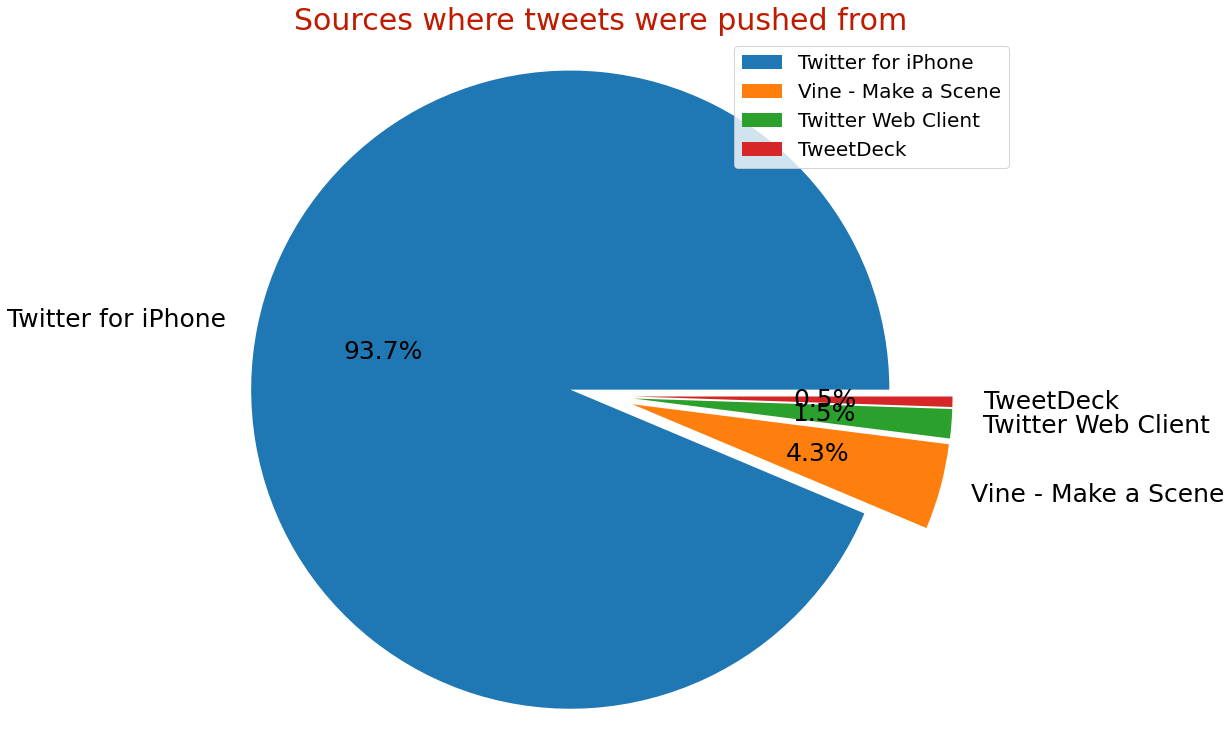

In [76]:
twitter_archive_clean.source.value_counts().plot(kind='pie',figsize=(15,13),label='',explode=(0.1, 0.1, 0.1, 0.1),
                                                 autopct="%1.1f%%",legend=True,fontsize=25)

plt.title("Sources where tweets were pushed from", color='#BF1B00', fontsize=30)
plt.axis("equal")
plt.legend(fontsize=20);

<a id='2nd'></a>
<font color='#fe8589'><h3><b>2nd Insight: <font color='#09aed5'>'Charlie', 'Lucy', 'Oliver' and Cooper are sharing almost the same times 11 or 10 to be a given name lying within the most given names, while 'Laika', 'Jeffri', 'Mollie', 'Leela', and 'Rhino' are lying on the tail with one time to be a given name.</font></b></h3></font>

In [77]:
twitter_archive_clean.name.value_counts()

a          55
Charlie    11
Lucy       11
Oliver     10
Cooper     10
           ..
Flash       1
light       1
Durg        1
Mya         1
Perry       1
Name: name, Length: 954, dtype: int64

<a id='3rd'></a>
<font color='#fe8589'><h3><b>3rd Insight: <font color='#09aed5'>With 132810 likes, a tweet sent on 2017-01-21 6:26:02 PM from Twitter for iPhone hitted the top score of favorite (like) count with the text "Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc" amongst all other tweets till August,1 2017</font></b></h3></font>

In [78]:
twitter_archive_clean['favorite_count'].describe()

count      2097.000000
mean       8980.902241
std       12199.636684
min          81.000000
25%        2046.000000
50%        4196.000000
75%       11416.000000
max      132810.000000
Name: favorite_count, dtype: float64

In [79]:
twitter_archive_clean.query('favorite_count == 132810')

,tweet_id,timestamp,favorite_count,retweet_count,text,source,expanded_urls,img_num,jpg_url,name,...,rating_denominator,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1771,8228721745569793,2017-01-21 18:26:02+00:00,132810,48265,Here's a super supportive puppo participating ...,Twitter for iPhone,https://twitter.com/dog_rates/status/822872901...,1,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,NaN,...,10,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True


In [80]:
list(twitter_archive_clean.query('favorite_count == 132810').text)[0]

"Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc"

<a id='4th'></a>
<font color='#fe8589'><h3><b>4th Insight: <font color='#09aed5'>Though not reaching the highest favorite count, and being sent from the least source of tweets, an 'Atticus' got the top rating numerator with 1776 from @dog_rates amongst all other tweets since 2015-11-15 10:32:08 PM, till August,1 2017 4:23:56 PM, on a tweet sent on 2016-07-04 3:00:45 PM from TweetDeck with the text "This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"</font></b></h3></font>

In [81]:
twitter_archive_clean['rating_numerator'].describe()

count    2092.000000
mean       12.163375
std        40.383400
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [82]:
twitter_archive_clean.query('rating_numerator == 1776')

,tweet_id,timestamp,favorite_count,retweet_count,text,source,expanded_urls,img_num,jpg_url,name,...,rating_denominator,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1326,749981277374128128,2016-07-04 15:00:45+00:00,5569,2772,This is Atticus. He's quite simply America af....,TweetDeck,https://twitter.com/dog_rates/status/749981277...,1,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,Atticus,...,10,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False


In [83]:
list(twitter_archive_clean.query('rating_numerator == 1776').text)[0]

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [84]:
twitter_archive_clean.query('name == "Atticus"')

,tweet_id,timestamp,favorite_count,retweet_count,text,source,expanded_urls,img_num,jpg_url,name,...,rating_denominator,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1294,7472198275263448,2016-06-27 00:07:44+00:00,5792,1791,This is Atticus. He's remaining calm but his c...,Twitter for iPhone,https://twitter.com/dog_rates/status/747219827...,2,https://pbs.twimg.com/media/Cl6odlVWQAIy5uk.jpg,Atticus,...,10,Shetland_sheepdog,0.548018,True,marmot,0.165503,False,collie,0.043003,True
1326,749981277374128128,2016-07-04 15:00:45+00:00,5569,2772,This is Atticus. He's quite simply America af....,TweetDeck,https://twitter.com/dog_rates/status/749981277...,1,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,Atticus,...,10,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False


In [85]:
list(twitter_archive_clean.query('name == "Atticus"').text)

["This is Atticus. He's remaining calm but his costume looks terrified. 11/10 https://t.co/uT7QeZI34U",
 "This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"]

In [86]:
#First and last tweets from the sorted by timestamp column twitter_archive_clean dataframe
twitter_archive_clean.iloc[[0,-1],:]

,tweet_id,timestamp,favorite_count,retweet_count,text,source,expanded_urls,img_num,jpg_url,name,...,rating_denominator,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,6688227149,2015-11-15 22:32:08+00:00,2535,532,Here we have a Japanese Irish Setter. Lost eye...,Twitter for iPhone,https://twitter.com/dog_rates/status/666020888...,1,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,NaN,...,10,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
2096,8924643555336193,2017-08-01 16:23:56+00:00,39467,8853,This is Phineas. He's a mystical boy. Only eve...,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643...,1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,Phineas,...,10,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


<a id='5th'></a>
<font color='#fe8589'><h3><b>5th Insight: <font color='#09aed5'>The most retweet count was for the favor of a "doggo" captured in a video by Tina Conrad, on a tweet sent on 2016-06-18 6:26:18 PM with the text "Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"</font></b></h3></font>

In [87]:
twitter_archive_clean['retweet_count'].describe()

count     2097.000000
mean      2841.667620
std       4709.238203
min         16.000000
25%        644.000000
50%       1405.000000
75%       3285.000000
max      79515.000000
Name: retweet_count, dtype: float64

In [88]:
twitter_archive_clean.query('retweet_count == 79515')

,tweet_id,timestamp,favorite_count,retweet_count,text,source,expanded_urls,img_num,jpg_url,name,...,rating_denominator,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1271,74423479930481,2016-06-18 18:26:18+00:00,131075,79515,Here's a doggo realizing you can stand in a po...,Twitter for iPhone,https://twitter.com/dog_rates/status/744234799...,1,https://pbs.twimg.com/ext_tw_video_thumb/74423...,NaN,...,10,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


In [89]:
list(twitter_archive_clean.query('retweet_count == 79515').text)[0]

"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"